<a href="https://colab.research.google.com/github/MisterKM1127/Diplomado_Ciencia_Datos/blob/master/Tarea_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:#F72585"><center>**TAREA 4.2**</center></span>

Escriba una clase con las siguientes funcionalidades:

1. Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv. Instancie los datos en un dataframe de Pandas.
2. Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables (sepal.length, sepal.width, petal.length, etc)
3. Implemente un método que entregue los nombre de las variables disponibles.
4. Implemente un método que reciba el nombre de una variable disponible dentro del objeto (en el dataframe) y regrese: sus estadísticas básicas: media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/AprendizajeProfundo/Diplomado-Avanzado/c01c908a0388a58b45cac707cb716438197a2d88/M%C3%B3dulo%2011%20-%20Mapas%20Auto%20Organizados/Datos/iris.csv"
data = pd.read_csv(url)

import pandas as pd

class IrisDataIterator:
    def __init__(self, data):
        self.dataframe = data
        self.index = 0
        self.count = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.index >= len(self.dataframe):
            raise StopIteration("\nerror")

        rows = self.dataframe.iloc[self.index:self.index+2]
        self.index += 2
        self.count += 1
        return rows

    def get_count(self):
        return self.count

    def get_dataframe(self):
        return self.dataframe

    def basic_statistics(self):
        return self.dataframe.describe()

    def available_variables(self):
        return self.dataframe.columns.tolist()

    def variable_summary(self, variable_name):
        if variable_name in self.dataframe.columns:
            variable_stats = self.dataframe[variable_name].describe()
            variable_hist = self.dataframe[variable_name].hist()
            plt.title(f'Histograma de {variable_name}')
            plt.xlabel(variable_name)
            plt.ylabel('Frequencia')
            plt.show()
            return variable_stats
        else:
            return "Variable no encontrada"

Una vez construida la clase, procedemos a mostrar en pantalla lo solicitado:

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
   sepal.length  sepal.width  petal.length  petal.width variety
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
   sepal.length  sepal.width  petal.length  petal.width variety
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
   sepal.length  sepal.width  petal.length  petal.width variety
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
   sepal.length  sepal.width  petal.length  petal.width variety
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa
    sepal.length  sepal.width  petal.len

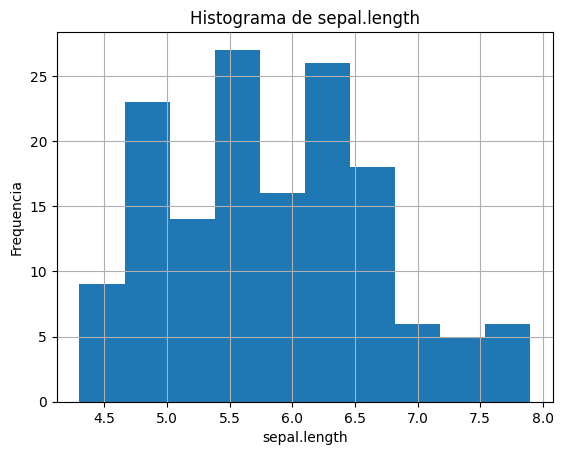

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal.length, dtype: float64


In [2]:
data_iterator = IrisDataIterator(data)

for _ in range(200):
    try:
        data_points = next(data_iterator)
        print(data_points)
    except StopIteration as e:
        print(e)
        break

dataframe_from_iterator = data_iterator.get_dataframe()

print("\nEstadisticas basicas:")
print(data_iterator.basic_statistics())

# Get available variable names
print("\nVariables disponibles:")
print(data_iterator.available_variables())

# Get summary of a specific variable
variable_name = "sepal.length"  # Replace with the variable you want to analyze
print(f"\nResumen de: '{variable_name}'")

print(data_iterator.variable_summary(variable_name))